## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('customer.csv')
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [3]:
data.shape

(250000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [5]:
data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [6]:
## null values for each columns
data.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [7]:
data.Returns.nunique()

2

In [8]:
data.Returns.value_counts()

Returns
1.0    101476
0.0    101142
Name: count, dtype: int64

In [9]:
# duplicate values
print(data.duplicated().sum())

0


In [10]:
data.Churn.value_counts()

Churn
0    199870
1     50130
Name: count, dtype: int64

In [11]:
data.nunique()

Customer ID               49661
Purchase Date            249728
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5245
Payment Method                3
Customer Age                 53
Returns                       2
Customer Name             39878
Age                          53
Gender                        2
Churn                         2
dtype: int64

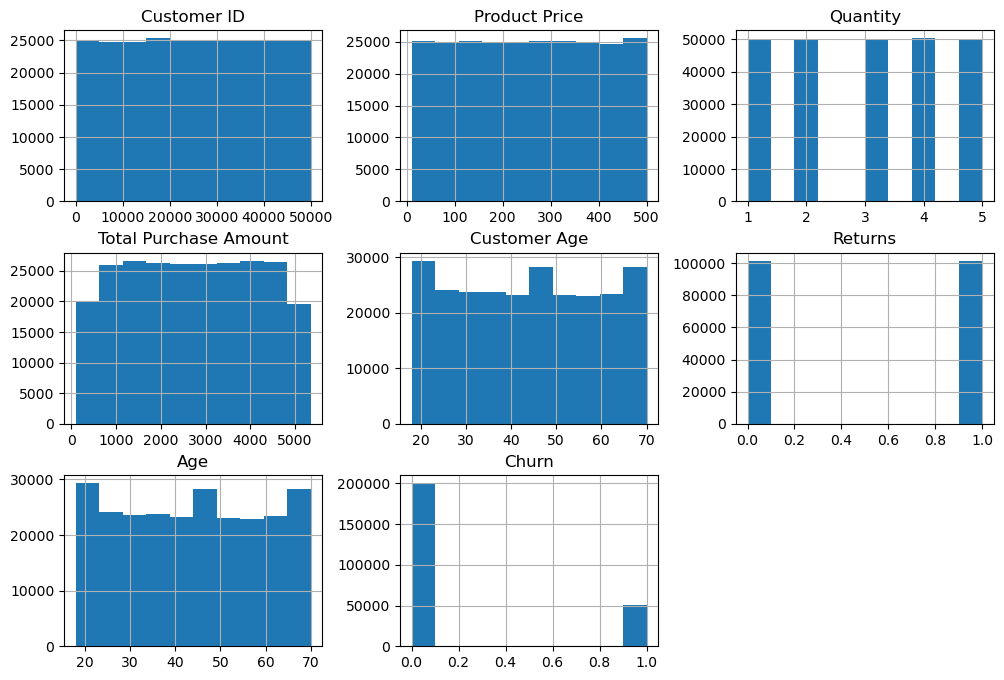

In [12]:
data.hist(figsize=(12, 8))
plt.show()

## Data Preprocessing & Fetaure Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler

In [14]:
#removing unnecassary coloumn
data.drop(['Customer ID', 'Customer Name'], axis=1, inplace=True)


In [15]:
## date time feature engineering
data['Purchase Date']=pd.to_datetime(data['Purchase Date'])
data['purchase_year']=data["Purchase Date"].dt.year
data['purchase_month']=data["Purchase Date"].dt.month
data['purchase_day']=data["Purchase Date"].dt.weekday

In [16]:
data.drop("Purchase Date",axis=1, inplace=True)

In [17]:
data

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,purchase_year,purchase_month,purchase_day
0,Home,177,1,2427,PayPal,31,1.0,31,Female,0,2023,5,2
1,Electronics,174,3,2448,PayPal,31,1.0,31,Female,0,2021,5,6
2,Books,413,1,2345,Credit Card,31,1.0,31,Female,0,2020,7,0
3,Electronics,396,3,937,Cash,31,0.0,31,Female,0,2023,1,1
4,Books,259,4,2598,PayPal,31,1.0,31,Female,0,2021,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Home,436,1,3664,Cash,63,0.0,63,Male,0,2023,1,1
249996,Electronics,233,1,4374,Credit Card,66,1.0,66,Female,0,2021,6,4
249997,Electronics,441,5,5296,Cash,63,NaN,63,Female,0,2022,11,3
249998,Electronics,44,2,2517,Cash,64,1.0,64,Male,0,2021,6,6


In [18]:
data.dropna(subset=['Returns'], inplace=True)
print(data.Returns.isnull().sum()) 

0


In [19]:
ohe_encode_cols=["Product Category","Payment Method"]
le_encode_cols=["Gender"]

In [20]:
# label encoder for binary coloumns
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data


,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,purchase_year,purchase_month,purchase_day
0,Home,177,1,2427,PayPal,31,1.0,31,0,0,2023,5,2
1,Electronics,174,3,2448,PayPal,31,1.0,31,0,0,2021,5,6
2,Books,413,1,2345,Credit Card,31,1.0,31,0,0,2020,7,0
3,Electronics,396,3,937,Cash,31,0.0,31,0,0,2023,1,1
4,Books,259,4,2598,PayPal,31,1.0,31,0,0,2021,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,Electronics,225,5,5293,Credit Card,60,0.0,60,0,0,2021,8,6
249995,Home,436,1,3664,Cash,63,0.0,63,1,0,2023,1,1
249996,Electronics,233,1,4374,Credit Card,66,1.0,66,0,0,2021,6,4
249998,Electronics,44,2,2517,Cash,64,1.0,64,1,0,2021,6,6


In [21]:
## one hot encoding
dummies=pd.get_dummies(data[ohe_encode_cols],drop_first=False)
data=data.drop(columns=ohe_encode_cols)
data= pd.concat([data, dummies], axis=1)

In [22]:
data

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Gender,Churn,purchase_year,purchase_month,purchase_day,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal
0,177,1,2427,31,1.0,31,0,0,2023,5,2,False,False,False,True,False,False,True
1,174,3,2448,31,1.0,31,0,0,2021,5,6,False,False,True,False,False,False,True
2,413,1,2345,31,1.0,31,0,0,2020,7,0,True,False,False,False,False,True,False
3,396,3,937,31,0.0,31,0,0,2023,1,1,False,False,True,False,True,False,False
4,259,4,2598,31,1.0,31,0,0,2021,5,5,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,225,5,5293,60,0.0,60,0,0,2021,8,6,False,False,True,False,False,True,False
249995,436,1,3664,63,0.0,63,1,0,2023,1,1,False,False,False,True,True,False,False
249996,233,1,4374,66,1.0,66,0,0,2021,6,4,False,False,True,False,False,True,False
249998,44,2,2517,64,1.0,64,1,0,2021,6,6,False,False,True,False,True,False,False


In [23]:
## Binning
data["customer_age_group"]=pd.cut(
    data['Customer Age'],
    bins=[0,20,30,40,50,60,100],
    labels=['0-19', '20-29', '30-39', '40-49', '50-59', '60+'],
    right=True
)
data=data.drop("Customer Age",axis=1)
data

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Gender,Churn,purchase_year,purchase_month,purchase_day,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,customer_age_group
0,177,1,2427,1.0,31,0,0,2023,5,2,False,False,False,True,False,False,True,30-39
1,174,3,2448,1.0,31,0,0,2021,5,6,False,False,True,False,False,False,True,30-39
2,413,1,2345,1.0,31,0,0,2020,7,0,True,False,False,False,False,True,False,30-39
3,396,3,937,0.0,31,0,0,2023,1,1,False,False,True,False,True,False,False,30-39
4,259,4,2598,1.0,31,0,0,2021,5,5,True,False,False,False,False,False,True,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,225,5,5293,0.0,60,0,0,2021,8,6,False,False,True,False,False,True,False,50-59
249995,436,1,3664,0.0,63,1,0,2023,1,1,False,False,False,True,True,False,False,60+
249996,233,1,4374,1.0,66,0,0,2021,6,4,False,False,True,False,False,True,False,60+
249998,44,2,2517,1.0,64,1,0,2021,6,6,False,False,True,False,True,False,False,60+


In [24]:
## Encode the new coloumn
age=pd.get_dummies(data['customer_age_group'])
data = pd.concat([data, age], axis=1)
data=data.drop("customer_age_group",axis=1)
data

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Gender,Churn,purchase_year,purchase_month,purchase_day,...,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,0-19,20-29,30-39,40-49,50-59,60+
0,177,1,2427,1.0,31,0,0,2023,5,2,...,True,False,False,True,False,False,True,False,False,False
1,174,3,2448,1.0,31,0,0,2021,5,6,...,False,False,False,True,False,False,True,False,False,False
2,413,1,2345,1.0,31,0,0,2020,7,0,...,False,False,True,False,False,False,True,False,False,False
3,396,3,937,0.0,31,0,0,2023,1,1,...,False,True,False,False,False,False,True,False,False,False
4,259,4,2598,1.0,31,0,0,2021,5,5,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,225,5,5293,0.0,60,0,0,2021,8,6,...,False,False,True,False,False,False,False,False,True,False
249995,436,1,3664,0.0,63,1,0,2023,1,1,...,True,True,False,False,False,False,False,False,False,True
249996,233,1,4374,1.0,66,0,0,2021,6,4,...,False,False,True,False,False,False,False,False,False,True
249998,44,2,2517,1.0,64,1,0,2021,6,6,...,False,True,False,False,False,False,False,False,False,True


In [25]:
data.drop('Age',axis=1,inplace=True)
data

,Product Price,Quantity,Total Purchase Amount,Returns,Gender,Churn,purchase_year,purchase_month,purchase_day,Product Category_Books,...,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,0-19,20-29,30-39,40-49,50-59,60+
0,177,1,2427,1.0,0,0,2023,5,2,False,...,True,False,False,True,False,False,True,False,False,False
1,174,3,2448,1.0,0,0,2021,5,6,False,...,False,False,False,True,False,False,True,False,False,False
2,413,1,2345,1.0,0,0,2020,7,0,True,...,False,False,True,False,False,False,True,False,False,False
3,396,3,937,0.0,0,0,2023,1,1,False,...,False,True,False,False,False,False,True,False,False,False
4,259,4,2598,1.0,0,0,2021,5,5,True,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,225,5,5293,0.0,0,0,2021,8,6,False,...,False,False,True,False,False,False,False,False,True,False
249995,436,1,3664,0.0,1,0,2023,1,1,False,...,True,True,False,False,False,False,False,False,False,True
249996,233,1,4374,1.0,0,0,2021,6,4,False,...,False,False,True,False,False,False,False,False,False,True
249998,44,2,2517,1.0,1,0,2021,6,6,False,...,False,True,False,False,False,False,False,False,False,True


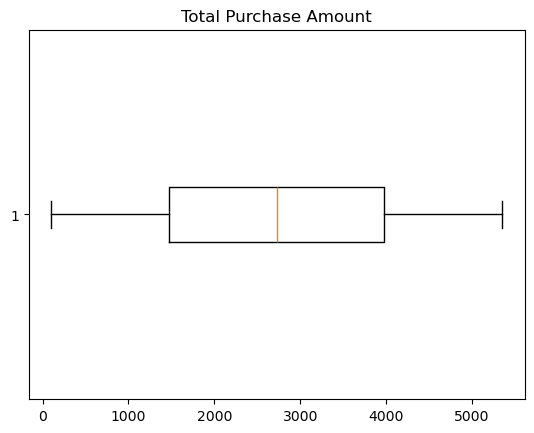

In [26]:
## outlier detction for price
plt.boxplot(data["Total Purchase Amount"],vert=False)
plt.title("Total Purchase Amount")
plt.show()


In [27]:
min_threshold,max_threshold=data["Total Purchase Amount"].quantile([0.001,0.999])

In [28]:
print(min_threshold,max_threshold)

148.0 5304.0


In [29]:
((data["Total Purchase Amount"]<min_threshold)|(data["Total Purchase Amount"]>max_threshold)).sum()

402

In [30]:
data.shape

(202618, 22)

In [31]:
data=data[((data["Total Purchase Amount"]>min_threshold)&(data["Total Purchase Amount"]<max_threshold))]

In [32]:
data.shape

(202199, 22)

In [33]:
## Data scaling
scaler = MinMaxScaler(feature_range=(0,1))
cols_to_scale = ["Total Purchase Amount","Product Price"]
scaled_vals=scaler.fit_transform(data[cols_to_scale])
scaled_data=pd.DataFrame(scaled_vals, columns=[col + "_scaled" for col in cols_to_scale],index=data.index)
data=pd.concat([data.drop(cols_to_scale, axis=1), scaled_data],axis=1)

In [34]:
data

,Quantity,Returns,Gender,Churn,purchase_year,purchase_month,purchase_day,Product Category_Books,Product Category_Clothing,Product Category_Electronics,...,Payment Method_Credit Card,Payment Method_PayPal,0-19,20-29,30-39,40-49,50-59,60+,Total Purchase Amount_scaled,Product Price_scaled
0,1,1.0,0,0,2023,5,2,False,False,False,...,False,True,False,False,True,False,False,False,0.441987,0.340816
1,3,1.0,0,0,2021,5,6,False,False,True,...,False,True,False,False,True,False,False,False,0.446061,0.334694
2,1,1.0,0,0,2020,7,0,True,False,False,...,True,False,False,False,True,False,False,False,0.426077,0.822449
3,3,0.0,0,0,2023,1,1,False,False,True,...,False,False,False,False,True,False,False,False,0.152891,0.787755
4,4,1.0,0,0,2021,5,5,True,False,False,...,False,True,False,False,True,False,False,False,0.475165,0.508163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,5,0.0,0,0,2021,8,6,False,False,True,...,True,False,False,False,False,False,True,False,0.998060,0.438776
249995,1,0.0,1,0,2023,1,1,False,False,False,...,False,False,False,False,False,False,False,True,0.681995,0.869388
249996,1,1.0,0,0,2021,6,4,False,False,True,...,True,False,False,False,False,False,False,True,0.819752,0.455102
249998,2,1.0,1,0,2021,6,6,False,False,True,...,False,False,False,False,False,False,False,True,0.459449,0.069388


In [35]:
data.Churn.value_counts()

Churn
0    161547
1     40652
Name: count, dtype: int64

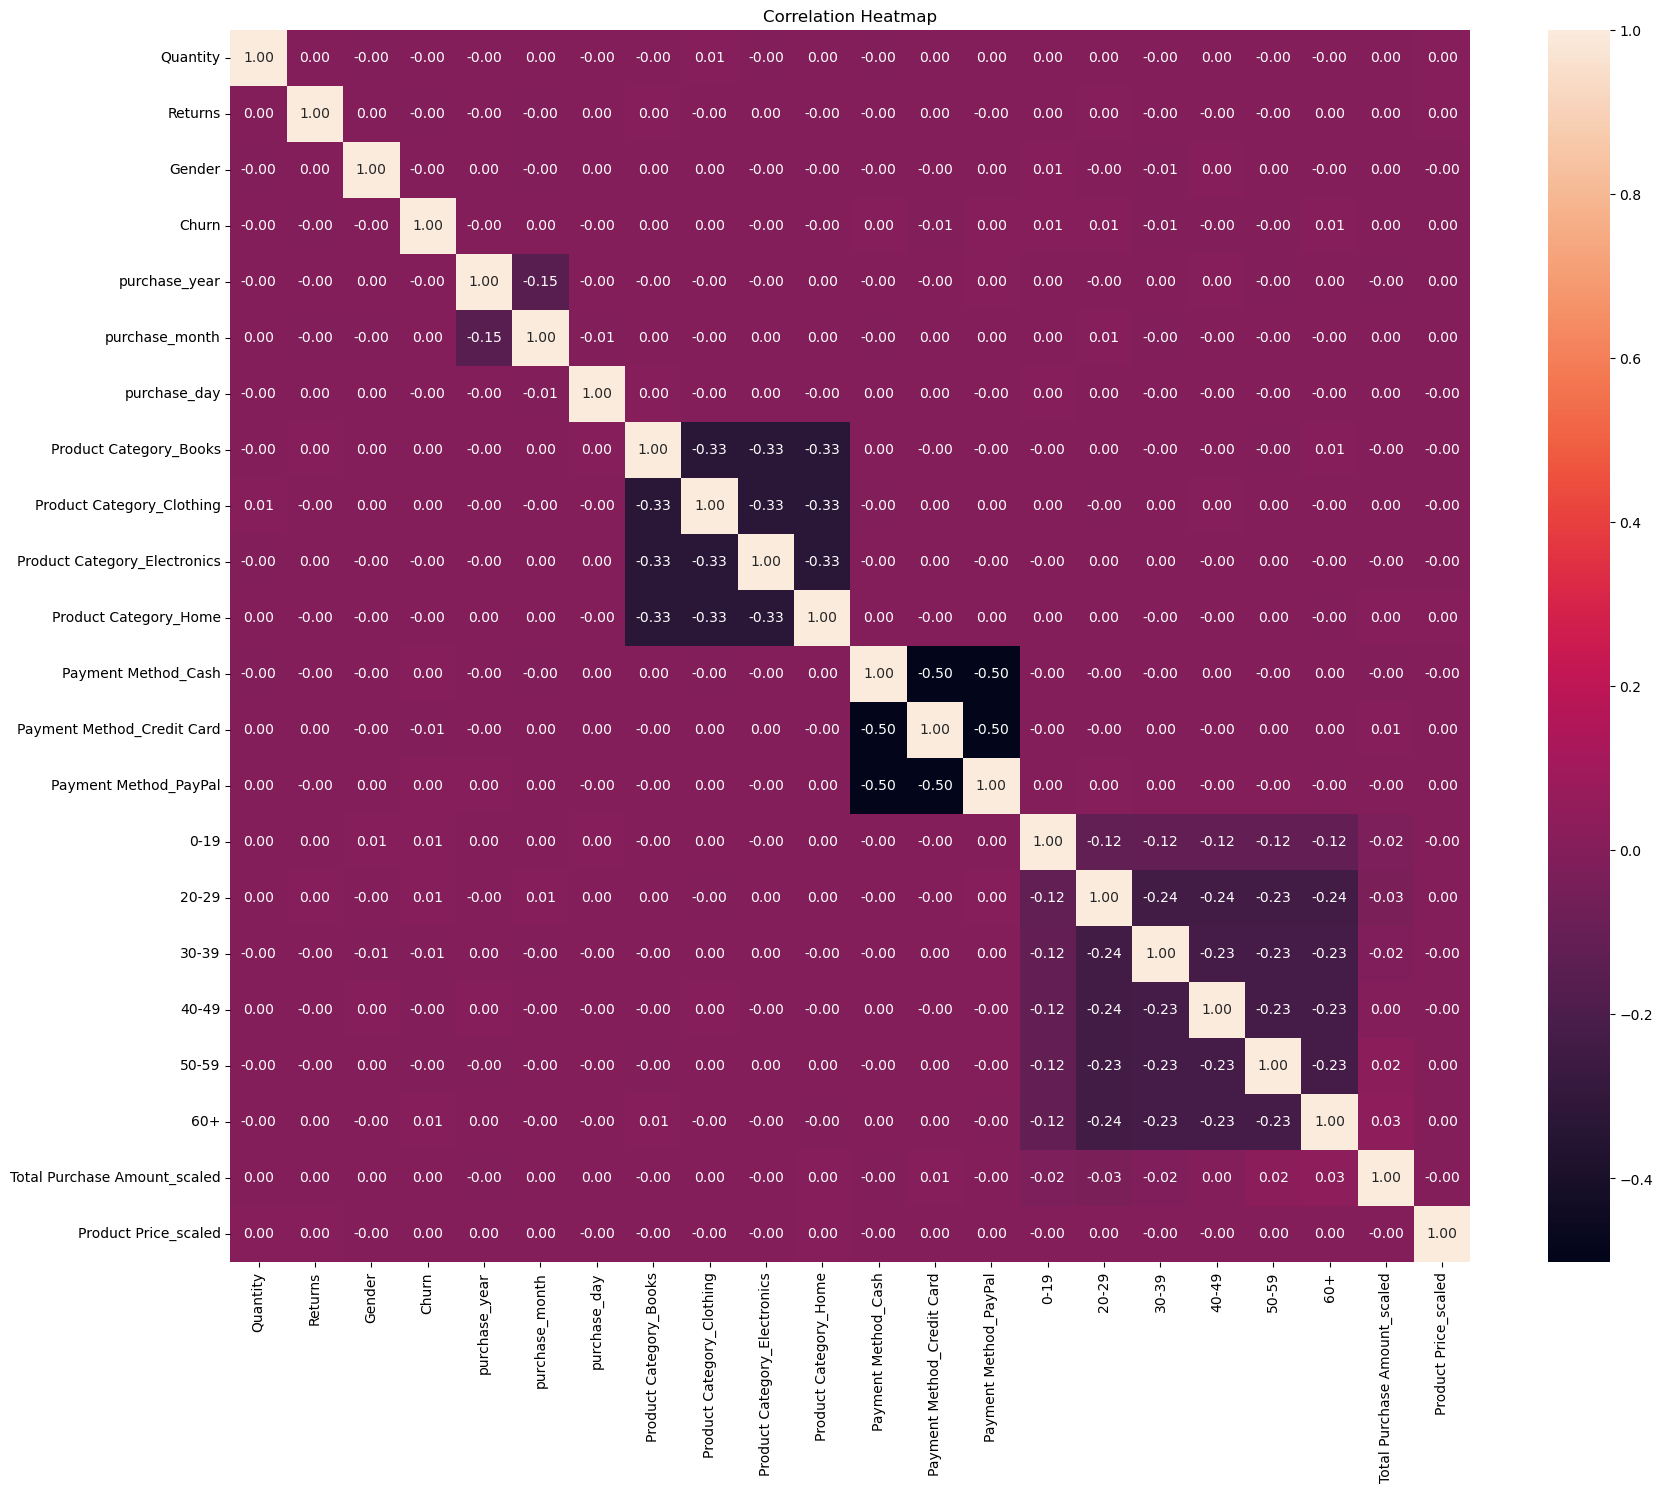

In [36]:
## data correaltion
correlation= data.corr()

plt.figure(figsize=(20,16))
sns.heatmap(correlation, annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [37]:
# split the model
from sklearn.model_selection import train_test_split

x=data.drop('Churn', axis=1)
y=data.Churn

xtrain,xtest,ytrain,ytest= train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [38]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
xtrain_res, ytrain_res = under_sampler.fit_resample(xtrain, ytrain)

## Model Building & Evaluation

In [39]:
data.isna().sum()

Quantity                        0
Returns                         0
Gender                          0
Churn                           0
purchase_year                   0
purchase_month                  0
purchase_day                    0
Product Category_Books          0
Product Category_Clothing       0
Product Category_Electronics    0
Product Category_Home           0
Payment Method_Cash             0
Payment Method_Credit Card      0
Payment Method_PayPal           0
0-19                            0
20-29                           0
30-39                           0
40-49                           0
50-59                           0
60+                             0
Total Purchase Amount_scaled    0
Product Price_scaled            0
dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [41]:
categorical = x.select_dtypes(include=['object']).columns
numeric = x.select_dtypes(exclude=['object']).columns

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

In [43]:
log_model=LogisticRegression(max_iter=1000)
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
svc_model= SVC() 

In [44]:
log_model.fit(xtrain_res, ytrain_res)
y_pred_log = log_model.predict(xtest)
print("Logistic Regression Performance:")
print(classification_report(ytest, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.50      0.62     32310
           1       0.21      0.52      0.30      8130

    accuracy                           0.51     40440
   macro avg       0.51      0.51      0.46     40440
weighted avg       0.69      0.51      0.56     40440



Text(50.722222222222214, 0.5, 'Truth')

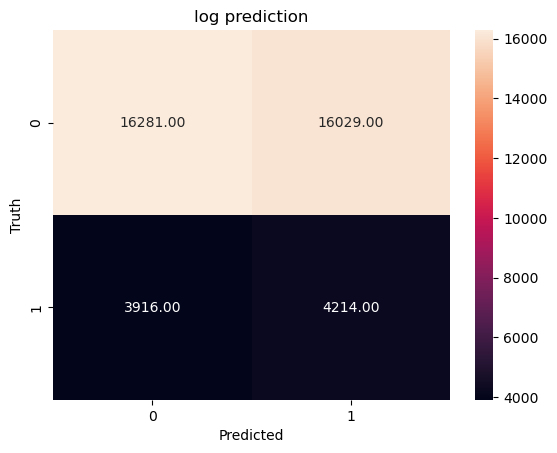

In [45]:
cm = confusion_matrix(ytest,y_pred_log)
plt.Figure(figsize=(10,7))
plt.title("log prediction")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
rf_model.fit(xtrain_res, ytrain_res)
y_pred_rf = rf_model.predict(xtest)
print("\nRandom Forest Performance:")
print(classification_report(ytest, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.51      0.63     32310
           1       0.20      0.49      0.29      8130

    accuracy                           0.51     40440
   macro avg       0.50      0.50      0.46     40440
weighted avg       0.68      0.51      0.56     40440



Text(50.722222222222214, 0.5, 'Truth')

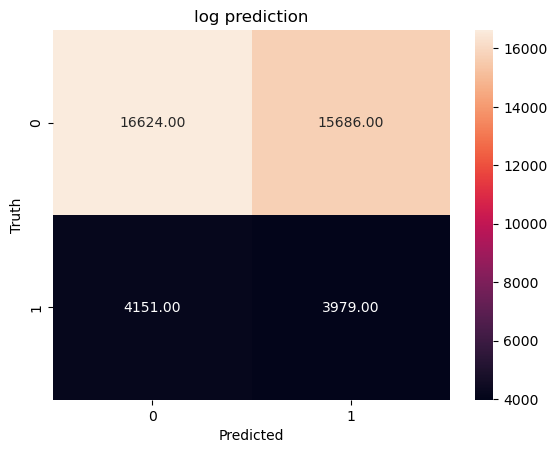

In [47]:
cm = confusion_matrix(ytest,y_pred_rf)
plt.Figure(figsize=(10,7))
plt.title("log prediction")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=48)

knn.fit(xtrain_res,ytrain_res)

,n_neighbors,48
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.56      0.66     32310
           1       0.20      0.45      0.28      8130

    accuracy                           0.54     40440
   macro avg       0.50      0.50      0.47     40440
weighted avg       0.68      0.54      0.58     40440



Text(50.722222222222214, 0.5, 'Truth')

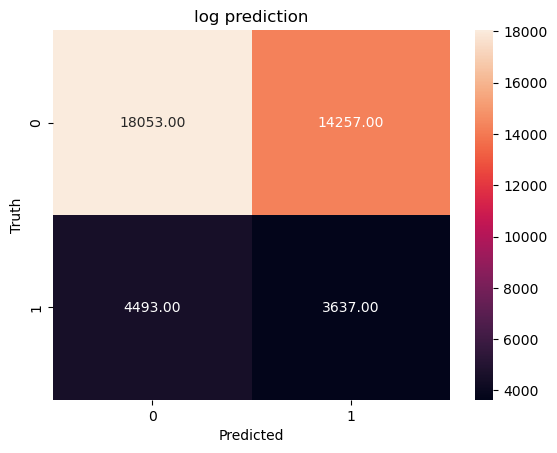

In [49]:
y_pred_k = knn.predict(xtest)
print("\nRandom Forest Performance:")
print(classification_report(ytest, y_pred_k))

cm = confusion_matrix(ytest,y_pred_k)
plt.Figure(figsize=(10,7))
plt.title("log prediction")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [50]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain_res,ytrain_res)

,priors,None
,var_smoothing,1e-09


\gnb Performance:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65     32310
           1       0.21      0.48      0.29      8130

    accuracy                           0.53     40440
   macro avg       0.51      0.51      0.47     40440
weighted avg       0.69      0.53      0.57     40440



Text(50.722222222222214, 0.5, 'Truth')

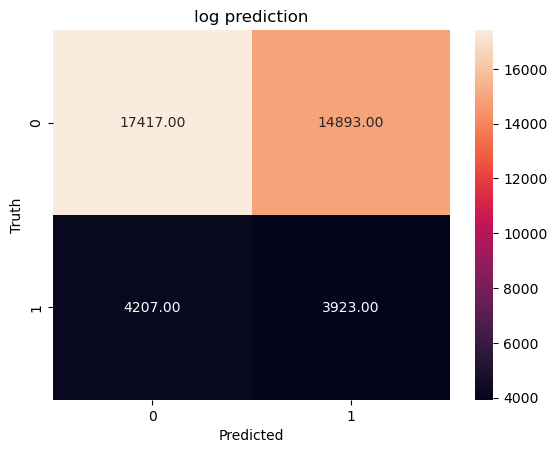

In [51]:
y_pred_gn = gnb.predict(xtest)
print("\gnb Performance:")
print(classification_report(ytest, y_pred_gn))

cm = confusion_matrix(ytest,y_pred_gn)
plt.Figure(figsize=(10,7))
plt.title("log prediction")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
from sklearn.cluster import KMeans
kn= KMeans(n_clusters=8)
kn.fit(xtrain_res,ytrain_res)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


\gnb Performance:
              precision    recall  f1-score   support

           0       0.80      0.14      0.24     32310
           1       0.21      0.11      0.14      8130
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.13     40440
   macro avg       0.13      0.03      0.05     40440
weighted avg       0.68      0.13      0.22     40440



c:\Users\ASUS\anaconda3\envs\dl-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\anaconda3\envs\dl-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\anaconda3\envs\dl-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Text(50.722222222222214, 0.5, 'Truth')

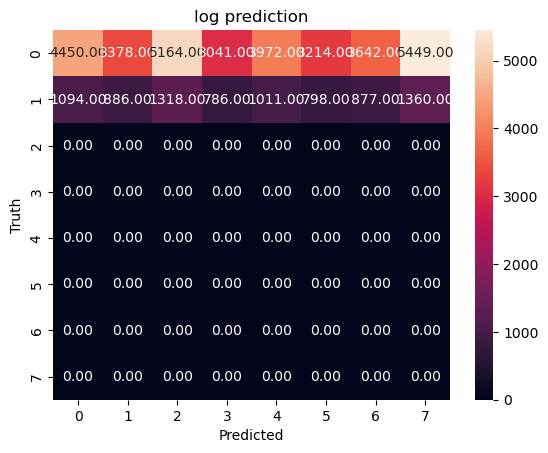

In [53]:
y_pred_km = kn.predict(xtest)
print("\gnb Performance:")
print(classification_report(ytest, y_pred_km))

cm = confusion_matrix(ytest,y_pred_km)
plt.Figure(figsize=(20,16))
plt.title("log prediction")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
import joblib

# Save Logistic Regression
joblib.dump(log_model, "log_model.pkl")

# Save Random Forest
joblib.dump(rf_model, "rf_model.pkl")

# Save SVM
joblib.dump(svc_model, "svc_model.pkl")

# Save KNN
joblib.dump(knn, "knn_model.pkl")

# Save Naive Bayes
joblib.dump(gnb, "gnb_model.pkl")

print("✅ All models saved successfully!")


✅ All models saved successfully!
